In [1]:
import pyautogui as ag
import time 
import requests
import glob
import os.path
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import display, Image, clear_output
from collections import OrderedDict
#import esbl 
%matplotlib widget
ip = '169.254.29.57'

In [2]:
#set temperature 
requests.get('http://'+str(ip)+':5000/temp/37').text

'success?'

In [3]:
# Button positions in Tecan Spark 
pos_edit_worklist_plate_in = (710,60)
pos_edit_worklist_start = (480,60)
pos_edit_worklist_end = (2420,1330)
pos_edit_worklist_pause = (2320,1330)
pos_edit_worklist_stop = (2460,1330)
pos_edit_worklist_plate_out_exp = (330,1330)

path_tecan_results = "C:\\Users\\Public\\Documents\\Tecan\\SparkControl\\Export\\xlsx\\" 

Plan: 
- set temperature for the media to 37 degrees 

- launch 10 min program on tecan 
- get results ( - background ) 
- if OD  is higher than target: 
    plate out;
    transfer 20ul of media + antibiotic; 
    plate in 
- launch 10 min program 


Opentron: 
- temperature module 
- container with media on the temperature module 
- trail -> tecan plate holder 
- tips 
- pipettes single channel / multi channel 300 ul 

### Overnight 
- OD at 0.306
### Preculture 
- started at 10:20 at OD ?  
- at  in plate reader OD of  
- at 13:30 in falcon (50 ml) OD of  0.183

for experiment preculture from falcon was used 

In [4]:
def get_tecan_results_file(): 
    file_type = '*.xlsx'
    files = glob.glob(path_tecan_results + file_type)
    last_file = max(files, key=os.path.getctime)
    return last_file

def read_excel_1(name): 
    data = np.array(pd.read_excel(name, engine='openpyxl'))
    start = np.where(data[:, 0] == 'Cycle Nr.')[0][0] + 1
    stop = np.where(data[:, 0] == 'End Time')[0][0] - 1
    times = np.array(data[start:stop, 1], dtype=np.float)
    plates = np.array(data[start:stop, 3:], dtype=np.float)
    return times / 3600, plates


Layout: 

- D2 -- media without bacteria ( will be substracted from all OD measurements) 
- Line E treatment at 0.0025 (25 ul at 128 mg/L)
- Line F, G treatment at 0.005 (50 ul at 64 mg/L) 
- Line H fresh media at 0.005 (50 ul of M9) 

Final treatment: 
16 mg/l 


In [5]:
def launch_program(): 
    ag.click(*pos_edit_worklist_start)
    time.sleep(10 * 60 + 10) 
    ag.click(*pos_edit_worklist_end)
    

In [6]:
wells = np.array([L + str(i) for L in "ABCDEFGH" for i in range(1, 12)])
empty_well_index = 12*3+1 #np.where(wells == 'D2')[0][0]
line1 = np.array([12*4 + x for x in range (1, 9)]) # E2-9
line2 = np.array([12*5 + x for x in range (1, 9)])#F2-9
line3 = np.array([12*6 + x for x in range (1, 9)])
line4 = np.array([12*7 + x for x in range (1, 9)])
lines = np.array([line1, line2, line3, line4]) 
OD_target_1 = 2.5 *10**(-3) 
OD_target_2 = 5 *10**(-3) 
OD0 = 5*10**(-4)

already_treated = [False] * 4
treatment_time = [-1] * 4 

OD_data_all_line_1 = np.array([])
OD_data_all_line_2 = np.array([])
OD_data_all_line_3 = np.array([])
OD_data_all_line_3 = np.array([])

times_all = np.array([])
start_time = 0 
treatment_time_l1 = 0
treatment_time_l2 = 0

t0 = time.time()

# Layout: 

media = np.array(['1 g/l glucose', '1 g/l glucose + 0.125 mg/l ctx', '1 g/l glucose + 0.25 mg/l ctx', '1 g/l glucose + 0.5 mg/l ctx', 
                  '1 g/l glucose + 1 mg/l ctx', '1 g/l glucose + 2 mg/l ctx', '1 g/l glucose + 4 mg/l ctx', '1 g/l glucose + 16 mg/l ctx'])


last_OD_line1 =  np.full((1, 8), OD0)
last_OD_line2 =  np.full((1, 8), OD0)
last_OD_line3 =  np.full((1, 8), OD0)
last_OD_line4 =  np.full((1, 8), OD0)

started at 14:05

Launching tecan
got OD
-0.010575000000000001 -0.010550000000000004 -0.010675 -0.010525
0 -0.010575000000000001
1 -0.010550000000000004
2 -0.010675
3 -0.010525
done step  0
Launching tecan
got OD
-0.09617500000000001 -0.057175000000000004 -0.06067500000000002 -0.11477500000000002
0 -0.09617500000000001
1 -0.057175000000000004
2 -0.06067500000000002
3 -0.11477500000000002
done step  1
Launching tecan
got OD
-0.018824999999999995 -0.045474999999999995 -0.047299999999999995 -0.04807499999999999
0 -0.018824999999999995
1 -0.045474999999999995
2 -0.047299999999999995
3 -0.04807499999999999
done step  2
Launching tecan
got OD
-0.009925000000000003 -0.010000000000000002 -0.009800000000000003 -0.009550000000000003
0 -0.009925000000000003
1 -0.010000000000000002
2 -0.009800000000000003
3 -0.009550000000000003
done step  3
Launching tecan
got OD
-0.009799999999999996 -0.009774999999999995 -0.009774999999999999 -0.009599999999999997
0 -0.009799999999999996
1 -0.009774999999999995
2 -0.009774999999

NameError: name 'last_OD_lines' is not defined

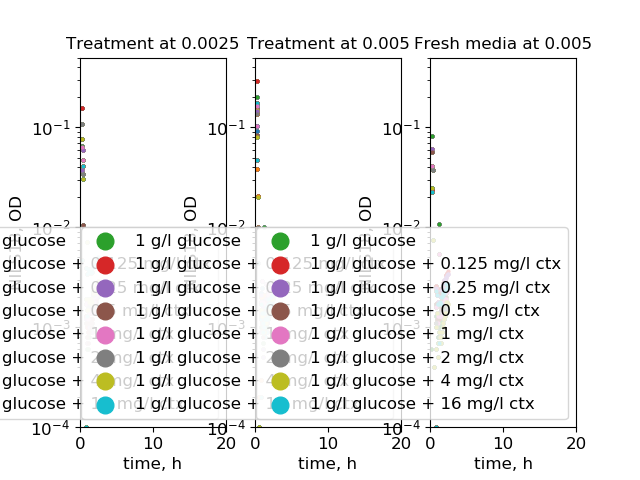

In [7]:
f3, ax3 = plt.subplots(1, 3, sharex=True)
#colors = plt.cm.tab20(np.linspace(0, 1, media.size))

for i in range(100): # ~ 16 hours -> evaporation of most of the volume 
    
    print("Launching tecan")
    launch_program()
    time.sleep(10)
    
    filename = get_tecan_results_file()
    times, data = read_excel_1(filename)
    print("got OD")
    OD_empty = data[-1, empty_well_index]
    if i > 0: 
        last_OD_line1 = OD_line1
        last_OD_line2 =  OD_line2
        last_OD_line3 =  OD_line3
        last_OD_line4 =  OD_line4
    OD_line1 = np.median(np.array(data[:, 12*4+1:12*4+9]), axis = 0) - OD_empty
    OD_line2 = np.median(np.array(data[:, 12*5+1:12*5+9]), axis = 0) - OD_empty
    OD_line3 = np.median(np.array(data[:, 12*6+1:12*6+9]), axis = 0) - OD_empty
    OD_line4 = np.median(np.array(data[:, 12*7+1:12*7+9]), axis = 0) - OD_empty
    
    OD_lines = np.array([OD_line1, OD_line2, OD_line3, OD_line4])
    last_OD_lines = np.array([last_OD_line1, last_OD_line2, last_OD_line3, last_OD_line4])
    print(np.median(OD_line1), np.median(OD_line2), np.median(OD_line3), np.median(OD_line4)) 
    
    tecan_open = False 
    
    for l in range(OD_lines.shape[0]): 
        target = OD_target_2
        print(l, np.median(OD_lines[l]))
        if l == 0: 
            target = OD_target_1
        #median_t = np.median(np.array([np.median(OD_lines[l]), np.median(last_OD_lines[l])]))
        if np.median(OD_lines[l]) >= target and np.median(last_OD_lines[l]) >= target and not already_treated[l]: 
            if not tecan_open: 
                ag.click(*pos_edit_worklist_plate_in)
                time.sleep(10)
                tecan_open = True 
            if l == 0: 
                requests.get('http://'+str(ip)+':5000/transfer/25/plate_temp/5/trail/1').text
            elif l < 3: 
                requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/6/trail/' + str(l + 1)).text
            else: 
                requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/7/trail/' + str(l + 1)).text
                
            requests.get('http://'+str(ip)+':5000/tips/drop').text
            already_treated[l] = True
            t = time.time() 
            treatment_time[l] = ( t - t0) / 3600 
            print("treated ", l + 1)
            time.sleep(20)
    
    if tecan_open: 
        ag.click(*pos_edit_worklist_plate_in)
        time.sleep(10)
        tecan_open = False
            
#         if np.median(OD_line2) >= OD_target and not already_treated[1]:
#             requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/2/trail/2').text
#             requests.get('http://'+str(ip)+':5000/tips/drop').text
#             already_treated[1] = True
#             t = time.time() 
#             treatment_time_l2 = ( t - t0) / 3600 
#             print("treated 2")
#             time.sleep(30)
#         ag.click(*pos_edit_worklist_plate_in)
#         time.sleep(10)
    
#     elif np.median(OD_line2) >= OD_target and not already_treated[1]: 
#         ag.click(*pos_edit_worklist_plate_in)
#         time.sleep(10)
#         requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/2/trail/2').text
#         requests.get('http://'+str(ip)+':5000/tips/drop').text
#         t = time.time() 
#         treatment_time_l2 = ( t - t0) / 3600 
#         time.sleep(30)
#         ag.click(*pos_edit_worklist_plate_in)
#         time.sleep(10)
#         print("treated 2")
    print("done step ", i)
    
    # save and plot data 
    if OD_data_all_line_1.size == 0: 
        OD_data_all_line_1 =  np.array(data[:, 12*4+1:12*4+9]) - OD_empty
        OD_data_all_line_2 =  np.array(data[:, 12*5+1:12*5+9]) - OD_empty
        OD_data_all_line_3 =  np.array(data[:, 12*6+1:12*6+9]) - OD_empty
        OD_data_all_line_4 =  np.array(data[:, 12*7+1:12*7+9]) - OD_empty
    else: 
        OD_data_all_line_1 = np.concatenate((OD_data_all_line_1,  np.array(data[:, 12*4+1:12*4+9]) - OD_empty))
        OD_data_all_line_2 = np.concatenate((OD_data_all_line_2,  np.array(data[:, 12*5+1:12*5+9]) - OD_empty))
        OD_data_all_line_3 = np.concatenate((OD_data_all_line_3,  np.array(data[:, 12*6+1:12*6+9]) - OD_empty))
        OD_data_all_line_4 = np.concatenate((OD_data_all_line_4,  np.array(data[:, 12*7+1:12*7+9]) - OD_empty))

    filename1 = os.path.basename(filename) 
    name = str(filename1).split('_')
    start, _ = (name[-1]).split('.')
    start = int(start[:2]) * 3600 + int(start[2:4]) * 60 + int(start[4:6]) - start_time
    if i == 0: 
        start_time = start
        start = 0
    elif start < 0: 
        start += 24 * 3600 
    times_all = np.append(times_all, times + start / 3600)
    
    ODs = np.array([OD_data_all_line_1, OD_data_all_line_2, OD_data_all_line_3, OD_data_all_line_4]) 
    for l in range(4):     
        for k in range(8):
            ax3[l - 1 * (l > 1)].scatter(times_all, ODs[l][:, k], s=4, label = media[k])
        if already_treated[l]: 
            ax3[l - 1 * (l > 1)].axvline(x = treatment_time[l], c = 'red', label = "treatment at " + str(treatment_time_l1))
    for x in range(ax3.size): 
        ax3[x].set_yscale('log')
        ax3[x].set_ylim(10**(-4), 0.5)
        ax3[x].set_xlim(0, 20)
        ax3[x].tick_params(axis='both', which='major', labelsize=12)
        ax3[x].set_ylabel('NILS18, OD', fontsize = 12)
        ax3[x].set_xlabel('time, h', fontsize = 12)
        handles, labels = ax3[x].get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        ax3[x].legend(by_label.values(), by_label.keys(), loc = 'lower right',  markerscale=6, fontsize = 12)      # bbox_to_anchor=(2, 1),
    ax3[0].set_title("Treatment at 0.0025") 
    ax3[1].set_title("Treatment at 0.005")
    ax3[2].set_title("Fresh media at 0.005")

Launching tecan
got OD
0.0033250000000000016 0.00315 0.0032249999999999987 0.003349999999999999
0 0.0033250000000000016
1 0.00315
2 0.0032249999999999987
3 0.003349999999999999
done step  0
Launching tecan
got OD
0.003524999999999997 0.0033999999999999968 0.003474999999999999 0.0034749999999999955
0 0.003524999999999997
treated  1
1 0.0033999999999999968
2 0.003474999999999999
3 0.0034749999999999955
done step  1
Launching tecan
got OD
0.004899999999999995 0.0038499999999999993 0.003875 0.003924999999999998
0 0.004899999999999995
1 0.0038499999999999993
2 0.003875
3 0.003924999999999998
done step  2
Launching tecan
got OD
0.005874999999999998 0.004200000000000002 0.0043249999999999955 0.004499999999999997
0 0.005874999999999998
1 0.004200000000000002
2 0.0043249999999999955
3 0.004499999999999997
done step  3
Launching tecan
got OD
0.006999999999999996 0.004699999999999996 0.004874999999999997 0.004975
0 0.006999999999999996
1 0.004699999999999996
2 0.004874999999999997
3 0.004975
done

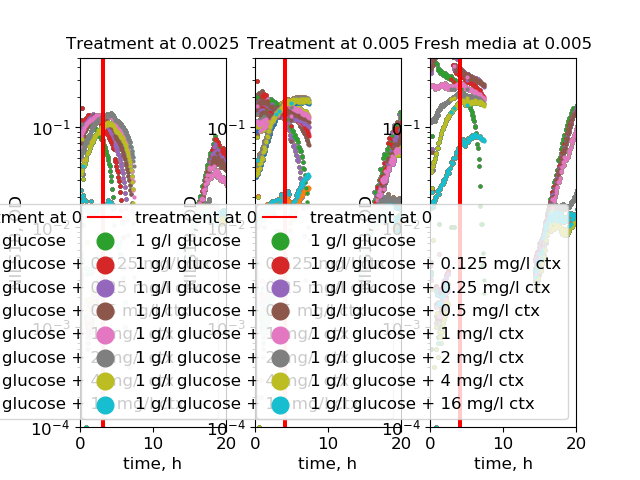

In [8]:
f3, ax3 = plt.subplots(1, 3, sharex=True)
#colors = plt.cm.tab20(np.linspace(0, 1, media.size))

for i in range(100): # ~ 16 hours -> evaporation of most of the volume 
    
    print("Launching tecan")
    launch_program()
    time.sleep(10)
    
    filename = get_tecan_results_file()
    times, data = read_excel_1(filename)
    print("got OD")
    OD_empty = data[-1, empty_well_index]
    if i > 0: 
        last_OD_line1 = OD_line1
        last_OD_line2 =  OD_line2
        last_OD_line3 =  OD_line3
        last_OD_line4 =  OD_line4
    OD_line1 = np.median(np.array(data[:, 12*4+1:12*4+9]), axis = 0) - OD_empty
    OD_line2 = np.median(np.array(data[:, 12*5+1:12*5+9]), axis = 0) - OD_empty
    OD_line3 = np.median(np.array(data[:, 12*6+1:12*6+9]), axis = 0) - OD_empty
    OD_line4 = np.median(np.array(data[:, 12*7+1:12*7+9]), axis = 0) - OD_empty
    
    OD_lines = np.array([OD_line1, OD_line2, OD_line3, OD_line4])
    last_OD_lines = np.array([last_OD_line1, last_OD_line2, last_OD_line3, last_OD_line4])
    print(np.median(OD_line1), np.median(OD_line2), np.median(OD_line3), np.median(OD_line4)) 
    
    tecan_open = False 
    
    for l in range(OD_lines.shape[0]): 
        target = OD_target_2
        print(l, np.median(OD_lines[l]))
        if l == 0: 
            target = OD_target_1
        #median_t = np.median(np.array([np.median(OD_lines[l]), np.median(last_OD_lines[l])]))
        if np.median(OD_lines[l]) >= target and np.median(last_OD_lines[l]) >= target and not already_treated[l]: 
            if not tecan_open: 
                ag.click(*pos_edit_worklist_plate_in)
                time.sleep(10)
                tecan_open = True 
            if l == 0: 
                requests.get('http://'+str(ip)+':5000/transfer/25/plate_temp/5/trail/1').text
            elif l < 3: 
                requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/6/trail/' + str(l + 1)).text
            else: 
                requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/7/trail/' + str(l + 1)).text
                
            requests.get('http://'+str(ip)+':5000/tips/drop').text
            already_treated[l] = True
            t = time.time() 
            treatment_time[l] = ( t - t0) / 3600 
            print("treated ", l + 1)
            time.sleep(20)
    
    if tecan_open: 
        ag.click(*pos_edit_worklist_plate_in)
        time.sleep(10)
        tecan_open = False
            
#         if np.median(OD_line2) >= OD_target and not already_treated[1]:
#             requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/2/trail/2').text
#             requests.get('http://'+str(ip)+':5000/tips/drop').text
#             already_treated[1] = True
#             t = time.time() 
#             treatment_time_l2 = ( t - t0) / 3600 
#             print("treated 2")
#             time.sleep(30)
#         ag.click(*pos_edit_worklist_plate_in)
#         time.sleep(10)
    
#     elif np.median(OD_line2) >= OD_target and not already_treated[1]: 
#         ag.click(*pos_edit_worklist_plate_in)
#         time.sleep(10)
#         requests.get('http://'+str(ip)+':5000/transfer/50/plate_temp/2/trail/2').text
#         requests.get('http://'+str(ip)+':5000/tips/drop').text
#         t = time.time() 
#         treatment_time_l2 = ( t - t0) / 3600 
#         time.sleep(30)
#         ag.click(*pos_edit_worklist_plate_in)
#         time.sleep(10)
#         print("treated 2")
    print("done step ", i)
    
    # save and plot data 
    if OD_data_all_line_1.size == 0: 
        OD_data_all_line_1 =  np.array(data[:, 12*4+1:12*4+9]) - OD_empty
        OD_data_all_line_2 =  np.array(data[:, 12*5+1:12*5+9]) - OD_empty
        OD_data_all_line_3 =  np.array(data[:, 12*6+1:12*6+9]) - OD_empty
        OD_data_all_line_4 =  np.array(data[:, 12*7+1:12*7+9]) - OD_empty
    else: 
        OD_data_all_line_1 = np.concatenate((OD_data_all_line_1,  np.array(data[:, 12*4+1:12*4+9]) - OD_empty))
        OD_data_all_line_2 = np.concatenate((OD_data_all_line_2,  np.array(data[:, 12*5+1:12*5+9]) - OD_empty))
        OD_data_all_line_3 = np.concatenate((OD_data_all_line_3,  np.array(data[:, 12*6+1:12*6+9]) - OD_empty))
        OD_data_all_line_4 = np.concatenate((OD_data_all_line_4,  np.array(data[:, 12*7+1:12*7+9]) - OD_empty))

    filename1 = os.path.basename(filename) 
    name = str(filename1).split('_')
    start, _ = (name[-1]).split('.')
    start = int(start[:2]) * 3600 + int(start[2:4]) * 60 + int(start[4:6]) - start_time
    if i == 0: 
        start_time = start
        start = 0
    elif start < 0: 
        start += 24 * 3600 
    times_all = np.append(times_all, times + start / 3600)
    
    ODs = np.array([OD_data_all_line_1, OD_data_all_line_2, OD_data_all_line_3, OD_data_all_line_4]) 
    for l in range(4):     
        for k in range(8):
            ax3[l - 1 * (l > 1)].scatter(times_all, ODs[l][:, k], s=4, label = media[k])
        if already_treated[l]: 
            ax3[l - 1 * (l > 1)].axvline(x = treatment_time[l], c = 'red', label = "treatment at " + str(treatment_time_l1))
    for x in range(ax3.size): 
        ax3[x].set_yscale('log')
        ax3[x].set_ylim(10**(-4), 0.5)
        ax3[x].set_xlim(0, 20)
        ax3[x].tick_params(axis='both', which='major', labelsize=12)
        ax3[x].set_ylabel('NILS18, OD', fontsize = 12)
        ax3[x].set_xlabel('time, h', fontsize = 12)
        handles, labels = ax3[x].get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        ax3[x].legend(by_label.values(), by_label.keys(), loc = 'lower right',  markerscale=6, fontsize = 12)      # bbox_to_anchor=(2, 1),
    ax3[0].set_title("Treatment at 0.0025") 
    ax3[1].set_title("Treatment at 0.005")
    ax3[2].set_title("Fresh media at 0.005")